<a href="https://colab.research.google.com/github/yeonheuiyeon/Machine-Learning-Practice/blob/master/%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_20181237%EC%97%B0%ED%9D%AC%EC%97%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>## 81점(100점)

>## 15+10+8+9+4+13+17+5

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# You need to mount your google drive  to the /content/gdrive folder of your virtual computer
# located in the colab server

from google.colab import drive
drive.mount("/content/gdrive")
#drive.mount("/content/gdrive", force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Guide lines: (1) notebook 에 나오는 fastai 문장들의 의미는 docs.fast.ai 에 상세히 설명되어 있으므로 참조하면 됨. (2)  클래스나 메소드 이름위에 커서를 놓고 Cntrl+Click 를 하면 노트북 오른쪽에 이에 대한 정의가 나오므로 이를 참조할 수 있다. (3) 답안은 문제 뒤에 notebook 에 직접 작성하고 결과는 숙제 제출하듯이 github에 업로드하면 된다. (4) 본 시험을 수행하는 동안 인터넷에서 다운 받은 이미지 데이타 파일들은 본인의 github에 MidTerm 폴더를 만들어 그안에  답안지 노트북과 함계 업로드한다. 

Question 1: (1.1) 아래 설명을 참조하여 구글에서 이미지 검색을 하여 동물 이미지를 5개의 카테고리를 지정하여 검색하라. 

>## 5점(5점)

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

(1.2) 검색된 각 이미지 리스트를 다음의 설명을 참조하여 개인 컴퓨터 다운로드 폴더에 다운로드하고 파일명을 urls_*.csv 형식으로 적절하게 명명하라 (그후 이 파일들은 개인의 구글 드라이브의 적절한 폴더에  upload 한다) 

>## 5점(5점)

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>+Shift</kbd><kbd>+j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### upload urls file into /content folder

(1.3)  다음 그림과 같이 구글 드라이브가 content/gdrive 폴더에 연결되는 것을 확인하고 스크린 캡춰를 해서 답안 노트북에 이미지를 삽입하라. 현재 시험 노트북에서 한 것 처럼 하면 된다. 시험문제에서 보여주는 파일구조와 경로는 예시로 보여준 것이며, 각자는 폴더구조가 다를 것이므로 이를 고려하여 노브툭 코드를 수정해야 한다. 이렇게 연결되면 colab notebook 은 구글 드라이브의 서브 폴더에 있는 *.csv 파일을 읽어 들일수 있다. ![alt text](https://drive.google.com/uc?id=1ObEUZxFDnXiK47lK_Lkg8z0e0Fe1T-QM)

>## 5점(5점)

* 파일 이미지 업로드
https://drive.google.com/file/d/1lL8Ib1U78xCehjvYTMHl1PETG6AZvWAF/view?usp=sharing
* 데이터 폴더 
https://drive.google.com/drive/folders/1UqMdmFaWAzakSkMJKKX5lRim4VXlEvmC?usp=sharing


You will need to run this cell once per each category.

In [0]:
path = Path('/content/gdrive/My Drive/Colab Notebooks/data/shell back')


In [14]:
print (path)

/content/gdrive/My Drive/Colab Notebooks/data/shell back


In [15]:
path.ls()
# Question 2: 위 명령어를 실행하여 무엇이 디스플레이되는지 확인하라. bears 폴더밑에 
# 등장하는 폴더 이름들이 이미지 classificaton 문제에서 어떤 역할을 하는지 설명하라. models 폴더를 제외하고.

[PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/shell back/turtle'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/shell back/marshnail'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/shell back/snail'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/shell back/scolpion'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/shell back/hcrab')]

>## 10점(10점)

Question 2 는 나중에 분류시에 카테고리 (라벨이 되는 것이다.) 따라서 ls를 실행하면 그 폴더 밑에 있는 폴더의 이름들이 나오고 예측이 가능한 카테고리가 된다. 따라서 5가지의 종류가 나온다.

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
classes = ['turtle','hcrab','snail','marshnail','scolpion']

In [21]:
# For example, Do this when download "urls_black.csv' file:
folder = 'hcrab'
dest = path/folder
file = 'urls_hcrab.csv'
download_images(dest/file, dest, max_pics=200,max_workers=0)
# Question 3: download_images() 명령을 실행하기 전의 dest 폴더의 내용과 이후의 내용이 
# 어떻게 바뀌는지 기술하라.  폴더 안에 등장하는 이미지 파일들의 갯수는 모두 몇개인가? 
# 이 갯수는 어떻게 결정되는가?

>## 8점(10점) 
최대 이미지 갯수 이외에 실제 다운받아지는 data에 대한 설명이 부족 + max_pics=200으로 설정됌.

* Q3 답 : 본코드를 실행 시 해당하는 URL로 가서 이미지를 다운 시킨다 따라서 폴더가 해당하는 다운된 이미지 파일로 채워지게 되며 파일들의 갯수는 각각 200개씩이 된다. 이 개수는 max_pics=20 에 할당되는 값에 의해 결정되게 된다.

본 코드 실행시 직접 해당하는 url로 접속하여 해당이미지를 다운 받는다. 따라서 이미지가 차 있는 폴더로 바뀐다. 

In [0]:
# If you have problems download, try with `max_workers=0` to see exceptions:
#download_images(dest/file, dest, max_pics=20, max_workers=0)
# cf: Having more workers will increase the memory usage and that’s the most serious overhead. 
# I’d just experiment and launch approximately as many as are needed to saturate the training. It depends on the batch size, but I wouldn’t set it to the same number - each worker loads a single batch and returns it only once it’s ready.
#num_workers equal 0 means that it’s the main process that will do the data loading when needed.
# For more information about num_works, refer to https://discuss.pytorch.org/t/guidelines-for-assigning-num-workers-to-dataloader/813


In [24]:
folder = 'snail'
dest = path/folder
file = 'urls_snail.csv'
download_images(dest/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [23]:
folder = 'marshnail'
dest = path/folder
file = 'urls_marshsnail.csv'
download_images(dest/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [25]:
folder = 'scolpion'
dest = path/folder
file = 'urls_scolpion.csv'
download_images(dest/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [19]:
folder = 'turtle'
dest = path/folder
file = 'urls_turtle.csv'
download_images(dest/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Then we can remove any images that can't be opened:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


grizzly


black


## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
                                                                    
# Question 4: 위 명령어에서 ImageDataBunch 클래스는 경로 path 파일구조안에 저장되어 있는 이미지 데이타를 
# 메모리 안으로 읽어들이는데 사용되는 여러가지 메소드을 정의한다.  from_folder() 메소드는 폴더구조를 
# 활용하여 이미지 분류에 필요한 정보를 읽어들이는 메소드이다. (4.1) 이 메소드의  파라미터들 중 
# train 은 무엇을 가리키는가 (4.2) valid_pct (= validation percentage ) 는 무엇을 가리키는가
# (4.3) ds_tfms 은 어떤 용도로 사용되는가? (4.4) size=224는 무엇을 의미하는가?
 


>## (4.1) 2점(2점)
>## (4.2) 4점(4점) 
>## (4.3) 1점(2점) 
변형에 대한 더 구체적인 서술이 필요하여 감점.(모범 답안 : 모델이 다양한 형태의 이미지 케이스를 처리하기 위해 이미즈들에 좌우반전, 회전, 뒤틀림, 색조변경 등의 변형을 적용한다.
>## (4.4) 2점(2점)

(4.1) 이 메소드의  파라미터들 중  train 은 무엇을 가리키는가
예측을 위해 학습을 진행할 데이터셋들을 의미한다. 
(4.2) valid_pct (= validation percentage ) 는 무엇을 가리키는가
검증을 위한 데이터 셋으로 train 이후에 검증을 위해 사용될 데이터 셋을 의미하고 할당된 값의 퍼센테이지 만큼 전체 데이터 셋에서 검증을 위해 사용된다.
(4.3) ds_tfms 은 어떤 용도로 사용되는가? 
데이터셋 형태로 만들어 주기위해 사용된다.따라서 데이터 셋 형성을 위해 변환을 해주는 함수를 할당한다.
(4.4) size=224는 무엇을 의미하는가?
이미지 크기를 설정해 줘야하는 이유는 GPU가 빠르게 동작하게 하기 위해 동일한 사이즈로 학습을 진행해야 한다. 정사각형의 크기로 진행하며 일반적으로 224*224로 진행한다.

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [0]:
data
# Question 5: 윗 명령을 실행하여 ImageDataBunch.from_folder() 의 결과가 저장된 data object 를 display 하라.
# display 된 것을 보면 data object 주어진 전체 데이타 집합을 신경망 Train 에 사용하는 데이타와 
# 신경망 검증 (Valid) 에 사용하는 데이타, 그리고 실제 테스트 (Test) 에 사용하는 데이타로 나누는데, 본 노트북은
# 테스트 데이타를 사용하지 않는다. 본 문제를 푸는데 data.classes, data.c, data.train_ds, data.valid_ds 명령어를  실행하여 
#  그 결과를 확인하는 것이 도움이 될 것이다.
# (5.1) (Valid 테이타의 수) / ( Train 데이타 수 + Valid 테이타 수) 를 
#  계산하면 어떤 값이 나오는가? 
# 이 값은 위에서 미리 설정한 어떤 파라미터 값과 동일한데, 그 파라미터가 무엇인지 기술하라.   
#  
# (5.2) data 오브젝트의 내부구조를 파악하는 것은 신경망 학습과정을 이해하는데 매우 중요하다. 이 data 는 사전구조를
# 가지므로 그 내용을 파악하기가 어렵지 않다.  
# (5.2) Train 데이타에서  x 는 이미지 리스트이고 ( = data.train_ds.x)  y 는 카테고리 리스트인데 (=data.train_ds.y),
#  아래 디스프레이된 표의 의미를 기술하라. [train_ds = train_dataset]
#  ( 아래 디스플레이된 것은 예시이며 각자의 노트북은 다를 것이다)
# (5.3) Valid 데이타에서  x 는 이미지 리스트이고  (data.valid_ds.x), y 는 카테고리 리스트인데 (data.valid_ds.y),
#   아래 디스프레이된 표의 의미를 기술하라.

ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: gdrive/My Drive/fastai-v3/data/bears;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,grizzly,black,teddys,teddys
Path: gdrive/My Drive/fastai-v3/data/bears;

Test: None

>## (5.1) 3점(6점) 직접 수집한 dataset을 대상으로 하지 않았으며, Parameter에 대한 정확한 명칭 기술 필요
모범답안 : `ImageDataBunch.from_folder`의 validataion_pct 값 0.2와 동일 + 기술한 설명

>## (5.2) 1점(2점) Training Set의 x값인 ImageList, y값인 CategoryList에 대한 현 노트북 데이터에 대한 해석(설명)이 부족하여 감점
(모범 답안 : Training Dataset에서는 320개의 item이 존재한다. x는 Image data(rgb의 3channel, 가로, 세로 224 size)의 ImageList이다. y는 각각의 Image Object들의 eurasian과 같은 Category(label)의 값을 의미한다. 이들은 `drive/My Drive/fastai-v3/data/bears`의 경로에서 가져왔다.)

>## (5.3) 0점(2점) 
(모범답안 : 전체 80개(=(320+80)*0.2) 의 Validation Set의 datas이다. x, y, path에 대한 설명은 5.2와 같다.)

(5.1) (Valid 테이타의 수) / ( Train 데이타 수 + Valid 테이타 수) 를 
계산하면 어떤 값이 나오는가? 
이 값은 위에서 미리 설정한 어떤 파라미터 값과 동일한데, 그 파라미터가 무엇인지 기술하라.   
답 :0.200 가 나온다. 이것은 전체 데이터 셋에서 약 20퍼센트 정도가 검증 데이터셋으로 사용되었다는 것을 의미하고 그 파라미터는 몇퍼센트를 검증 데이터셋으로 할건지를 정하는 파라미터다.
(5.2) data 오브젝트의 내부구조를 파악하는 것은 신경망 학습과정을 이해하는데 매우 중요하다. 이 data 는 사전구조를 가지므로 그 내용을 파악하기가 어렵지 않다.  (5.2) Train 데이타에서  x 는 이미지 리스트이고 ( = data.train_ds.x)  y 는 카테고리 리스트인데 (=data.train_ds.y), 아래 디스프레이된 표의 의미를 기술하라. [train_ds = train_dataset]
답 : 기존의 원본데이터의 X,Y값들과 데이터셋의 값이 같게 해주기 위한 방식이다.

(5.3) Valid 데이타에서  x 는 이미지 리스트이고  (data.valid_ds.x), y 는 카테고리 리스트인데 (data.valid_ds.y), 아래 디스프레이된 표의 의미를 기술하라.

In [0]:
len(data.valid_ds.y)


     

80

In [0]:
data.classes

['black', 'grizzly', 'teddys']

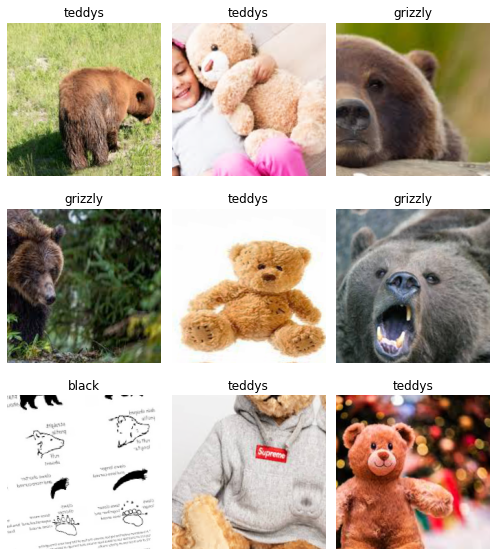

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 320, 80)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# Question 6: cnn_learner() 는 cnn 신경망을 학습하는 프로그램을 내장한 object인 learn 을 
# 생산하는 함수이다. 이 learn 오브젝트가 제공하는 학습실행 메소드를 실행하면 신경망의 학습이 완료된다
# cnn_learner 함수의 두번째 파라미터는 resnset34 라고 불리는 이미지 분류를 위해 설계된 신경망 구조 (architecture)
# 이다. resnet34 는 이 신경망 구조를 지칭하는 말로 쓰이기도 하지만, 문맥에 따라서는 주어진 이미지에 대해 
# 37 개의 카테고리에 속할 확률을 계산하기 위해 아주 많은 수의 이미지를 대상으로  이미 학습된 신경망을 가리키기도 한다. 
# 본 노트북의 경우 인터넷에서 검색한 이미지들에 대해서 우리가 설정한 카테고리를 이용하는 신경망을 구축하는 것이 
# 목적인데 위 명령어는 resnet34 이라는 구조를 이용하여 구축한다는 것을 의미한다.  
# (6.1) cnn_learner() 는 위에 표시된 파라미터 이외에도 다른 파라미터가 있는데 그중에 특히 중요한 것이
# pretrained 라는 것인데, 위 명령어에서는 명시적으로 설정되지 않았다. 이 경우 이 파라미터는 default 값을 가지는데
# 이 default값이 True 이다. 이것은 이미 학습된 resnet34 를 이용하라는 뜻이다. 어떻게 이용하는지 그 원리와 근거를 
# 기술하라. (6.2) pretrained = False 로 설정하면 어떤 일이 일어나는가?  본 노트북은 수백개의 이미지를 가지고 신경망을
# 학습하는데, pretrained = False 상태에서 수백개의 이미지를 가지고 신경망을 학습시킬 경우 그 신경망의 성능에 대해서
# 어떤 예측을 할 수 있는가?   

>## (6.1) 8점(10점) pretrainied model을 어떻게 이용하는지에 대한 서술이 부족
(모범답안 : cnn_learner는 Resnet34라는 arch와 그 pretrained model을 가져와 기존의 앞부분 layer들의 가중치는 그대로 사용하며(freeze), 현재 wolves을 분석하기 위한 마지막 layer들만을 수정(정교화)시킨다. 

>## (6.2) 5점(5점)
(모범답안 : pretrained가 false일 경우, model의 모든 가중치를 랜덤하게 초기화하여 다시 fitted시킨다. 이 경우 더 많은 epoch를 통한 학습의 자원이 필요하며, 이 경우, data가 부족하고 너무 많은 epoch를 돌렸을 때에는 overfitted가 발생할 수 있는 등 성능이 떨어질 수도 있다.)

* 6.1 닶 : 일단 기본적으로 트레인 되어 있는 학습 모델 구조인 RESNSET34를 가지고 사용할 수 있도록 디폴트 값으로 되어있다. 하지만 수정을 할 경우에는 FALSE로 변경후 사용해야한다.
* 6.2 답 : 기본적으로 많은 트레이닝 시간이 걸린다. 또한 그 성능 또한 기존의 트레인 되어 있는 모델 보다 현저히 낫다.

In [0]:
learn.fit_one_cycle(4)
# Question 7: (7.1) 위 명령어가 하는 일은 무엇이며, 그 결과로 디스플레이되는 아래 표에서 epoch 는 무엇을 가리키며,
#  각 epoch에 대해서 # 표시되는 train_loss, valid_loss, error_rate 은 무엇을 의미하는지 설명하라. 
# (7.2) epoch가 증가할 수록 train_loss와 valid_loss의 값이 어떻게 변화되는가? 이 변화의 의미는 무엇인가?


epoch,train_loss,valid_loss,error_rate,time
0,1.458148,2.175350,0.462500,00:04
1,1.211517,1.806642,0.337500,00:04
2,1.055485,1.532237,0.337500,00:04
3,0.946218,1.402764,0.312500,00:04


>## (7.1) 7점(10점) `fit_one_cycle`에 대한 설명 누락
(모범답안 : fit_one_cycle()은 1 cycle policy를 이용해 neural net을 fit시킨다. 이 때 epoch는 전체 dataset에 대해 forward pass/ backward pass 과정을 거치는 것을 의미한다. `train_loss`는 train_set을 학습할 때 발생한 loss function(ex RMSE)의 현재 결과값, `valid_loss`는 validation set을 학습할 때의 발생한 loss function의 현재 결과값, error_rate는 1-accuracy의 예측 정확도를 의미한다.

>## (7.2) 10점(10점)

* 7.1 답 : train_loss는 트레이닝을 진행하며 손실이 일어난것으로, 맞을 것같은 신뢰도가 높았는데 실제로 틀렸을 경우 손실이 일어난다. vaild_loss는 검증데이터셋에서 동일한 모델로 적용했을경우의 손실정도이다. 그리고 마지막은 오류율로서 최종적으로 본 모델의 성능을 알려주는 지표이다.
* 7.2 답 : epoch란 모든 데이터 지점을 실행하는 것으로, 비탄력적인 기울기 강하에서는 모든 루프에서 전체 데이터셋을 수행한다. 미니배치의 크기가 100이라면 이미지를 한번보는데 10번을 반복해야한다. 너무 적게 하면 오차율과 손실률이 높아진다. epoch 가 많아지면  과적합이 일어난다. 오버피팅은 오류율이 개선되었다가 다시 늘어남. Train loss가 vaild loss보다 현저히 낮다면 지나치게 오버피팅이다.





In [0]:
interp = ClassificationInterpretation.from_learner(learn)

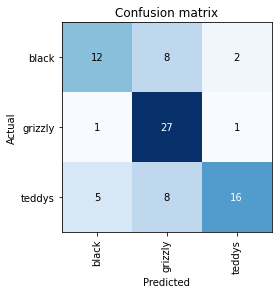

In [0]:
interp.plot_confusion_matrix()
# Question 8: interp object 는 학습된 신경망의 분류 능력을 해석/평가하는데
# 사용되는 오브젝트이다. plot_confusion_matrix() 메소드는 분류능력을 해석하는데 도움을 
# 주는 데이타이다. 이 표에 의하면 학습된 신경망의 이미지 분류 성능에 대해서 어떤 평가를 할 수 있는지
# 최대한 상세히 기술하라. ( 이 표도 예시이며 각자가 5개의 카테고리를 
# 분류하는 신경망을 구축하는 경우 다른 표가 나올 것이다)  

>## 5점(10점) 이부분은 공정성 때문에 고민을 많이 했습니다. confusion matrix에 대한 설명을 그래도 서술하였으니 기본점수를 드립니다. 
다만 학생분의 실제 데이터를 대상으로 하지 않았고, code를 실행 하지 았았으며, 그 code 실행을 통한 결과인 confusion matrix들을 어떻게 해석해야 하는지에 대한 언급이 없어 이부분을 감점하였습니다.
(모범답안 x축은 모델이 예측한 category의 결괏값, y축은 실제 그 data의 category 값을 의미한다. 이때 대각선의 경우에는, 예측값과 실제값이 일치하는 경우를 의미한다. 대각선에 있지 않은 값들의 경우에는 그 예측이 틀린 경우이며, 각 칸들의 색깔이 진할수록 해당 case가 많음을 의미한다. 
현재 이용한 모델과 데이터셋에서는 grizzly의 image들을 가장 잘 예측했으며, black-grizzly의 경우 서로 틀린 경우가 많기에 모델 예측이 어렵다는 것을 의미한다.

오차 행렬이란 데이터 모델의 성능을 평가하는 것이다. 분류를 진행하면서 얼마나 헷갈리고 있는지를 알려준다. 또한 어떤 예측오류가 발생하는 지도 알수 이다. 분류해야하는 카테고리가 n개 라면 n*n 크기의 행렬이 생성된다. 정확도는 전체 데이터 중 올바르게 예측한 비율 입니다. 정밀도는 에측 true중의 실제 true의 비율이다. 재현율을 실제 true분의 예측 true이다. F1 score는 재현율과 정밀도 조화 평균입니다.
